In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob,sys,socket,fileinput
import os.path
import matplotlib.pyplot as plt
import scipy as sp
from scipy.fft import rfft,rfftfreq,irfft

In [9]:
# Folder es la carpeta en donde estan los .txt que se sacan del monitor del arduino

folder = "Raw Data Drag/"
files = np.sort(glob.glob(folder+'*.txt'))

In [10]:
# en calibrationData va el nombre del archivo que 
calibrationfile = "CalibrationDataDrag.txt"
calibrationData=open(calibrationfile,"w")
calibrationData.write('txt,Media_Lift,Media_Drag,STD Lift,STD Drag\n');

D00.txt
D10.txt
D30.txt
D60.txt
D80.txt


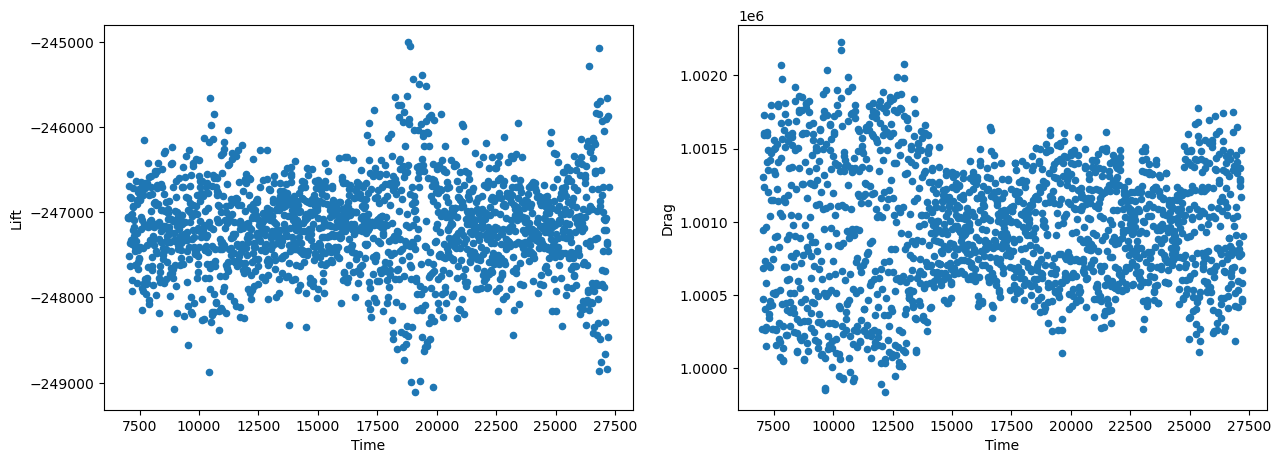

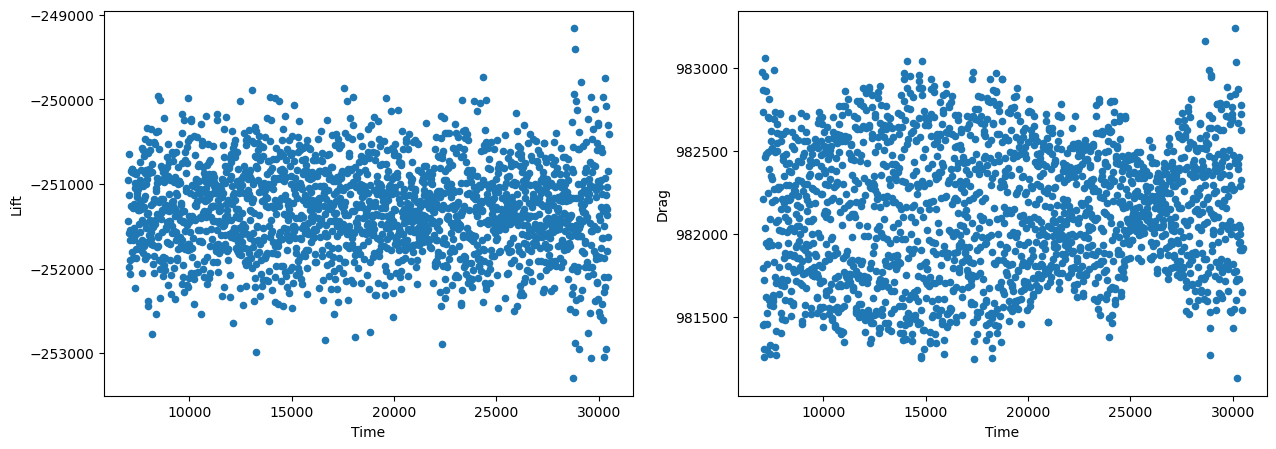

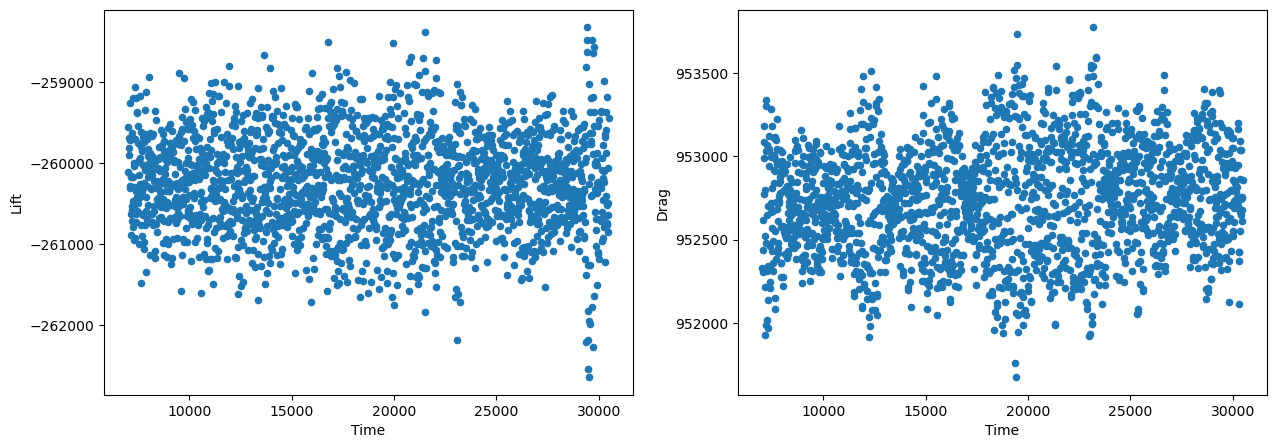

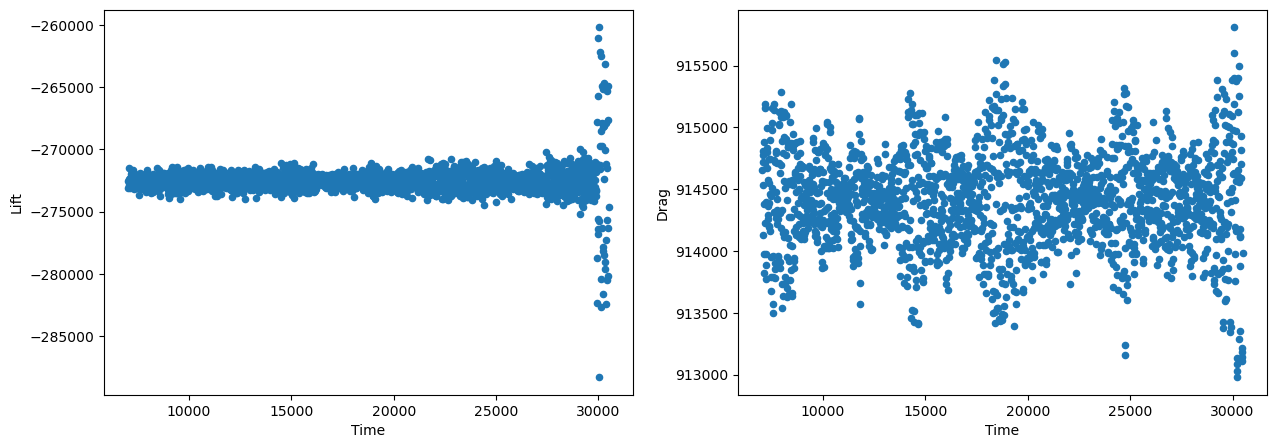

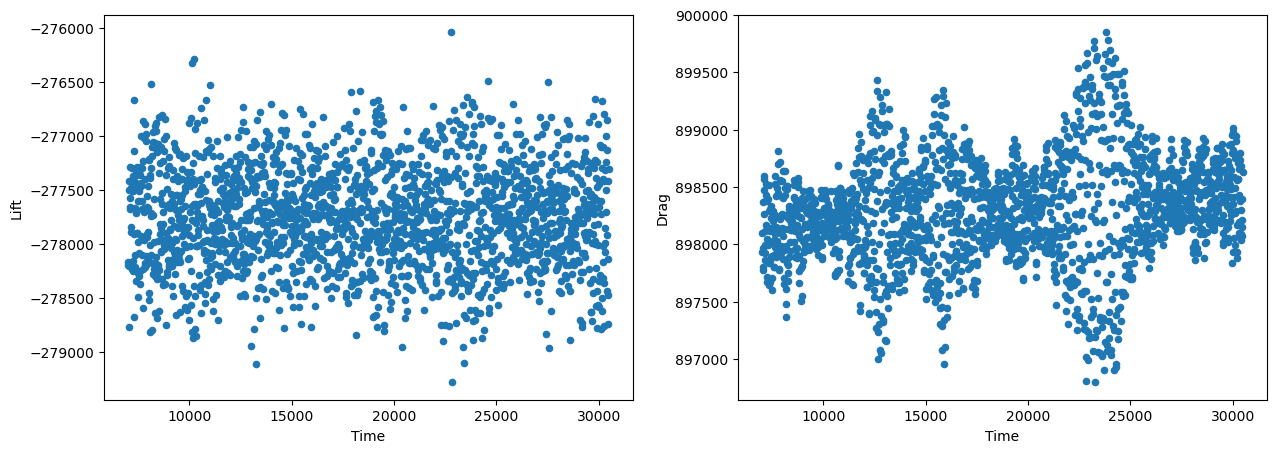

In [11]:
for k in files:
    datos = pd.read_csv(k, sep=",", header=None,skiprows=5)
    datos = datos[:-100]
    datos.columns = ["Lift", "Drag", "Time"]
    datos = datos.astype(float)
    datos=datos[500:2500]
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    df=datos
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+4*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-4*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+4*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-4*stdDrag):
            df["Drag"][i]=np.nan
            
    
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+4*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-4*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+4*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-4*stdDrag):
            df["Drag"][i]=np.nan
    
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    
    df.interpolate(method ='linear', limit_direction ='backward', inplace=True)
    
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 5)
    df.plot.scatter(ax=axes[0],x="Time", y="Lift")
    df.plot.scatter(ax=axes[1],x="Time", y="Drag")
    fig.savefig(k+".png", dpi=100)
    tag=k.split('\\')[1]
    print(tag)
   
    # Las lineas vienen como #.txt,mediaL,mediaD,stdL,stdD
    calibrationData.write(tag+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+"\n")
    

In [12]:
A = pd.read_csv(calibrationfile)
A

,txt,Media_Lift,Media_Drag,STD Lift,STD Drag
0,D00.txt,-247175,1000945,547,436
1,D10.txt,-251303,982138,538,398
2,D30.txt,-260242,952734,593,321
3,D60.txt,-272548,914410,1218,372
4,D80.txt,-277755,898293,467,445


<function matplotlib.pyplot.show(close=None, block=None)>

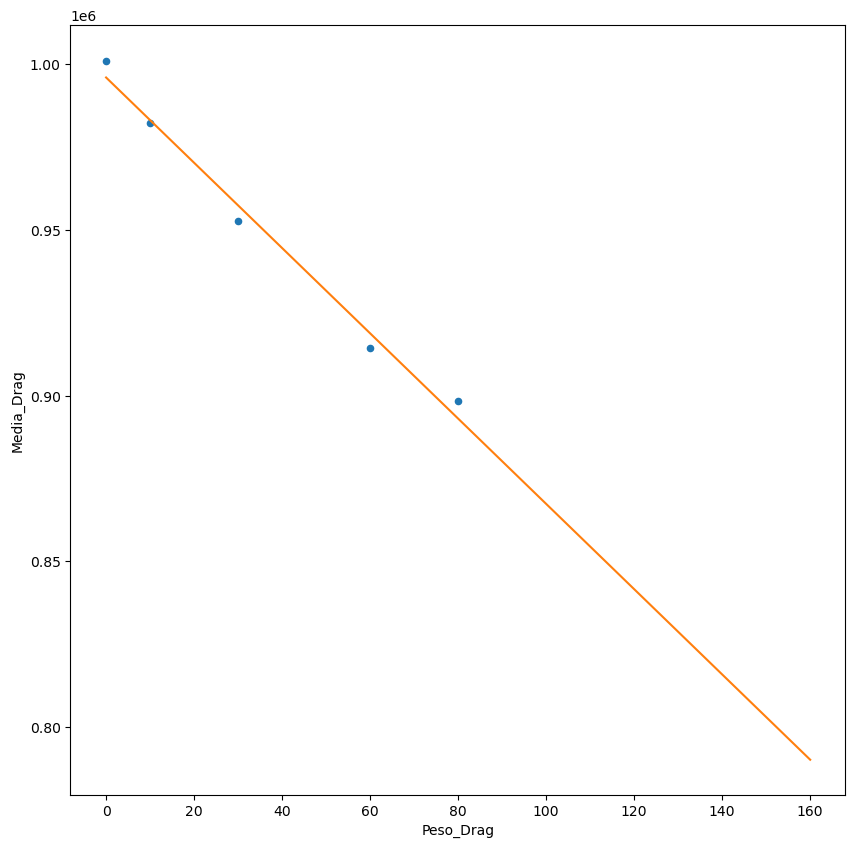

In [13]:
valores_masa_drag = pd.Series([0,10,30,60,80])
A["Peso_Drag"]=valores_masa_drag
A["Error Masa"]=0.1

polyline = np.linspace(0, 160, num=160)

PoliDrag = np.polyfit(A["Peso_Drag"].values,A["Media_Drag"].values,1)

ajuste_drag = np.poly1d(PoliDrag)

A.plot.scatter(y="Media_Drag", x="Peso_Drag", yerr="STD Drag", xerr="Error Masa")
plt.plot(polyline, ajuste_drag(polyline))
#plt.figure(figsize=(15, 15), dpi=150)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show




In [14]:
PoliDrag

array([ -1286.56637168, 996020.38938053])